   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
1       2  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
2       3  CA-2017-138688  12-06-2017  16-06-2017    Second Class    DV-13045   
3       4  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   
4       5  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

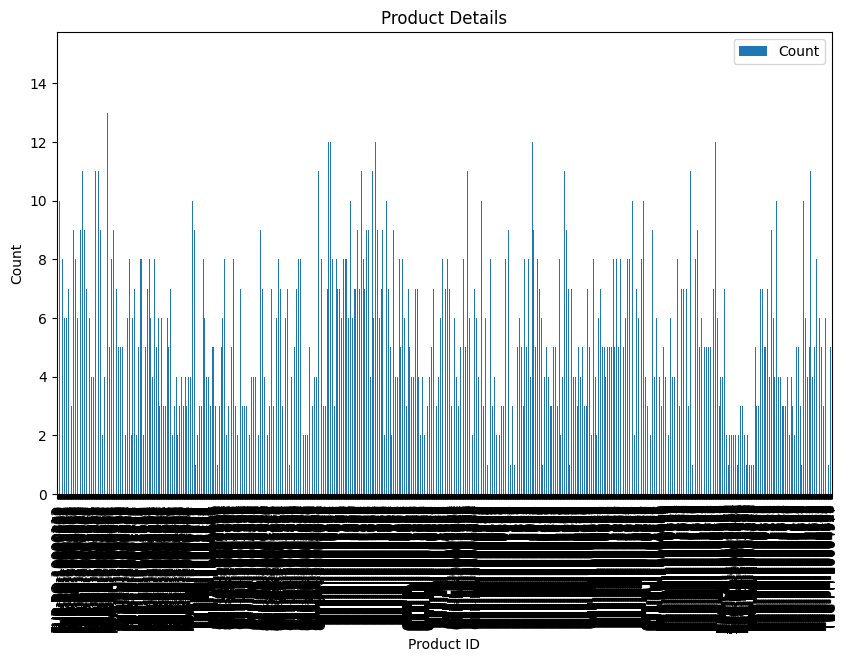

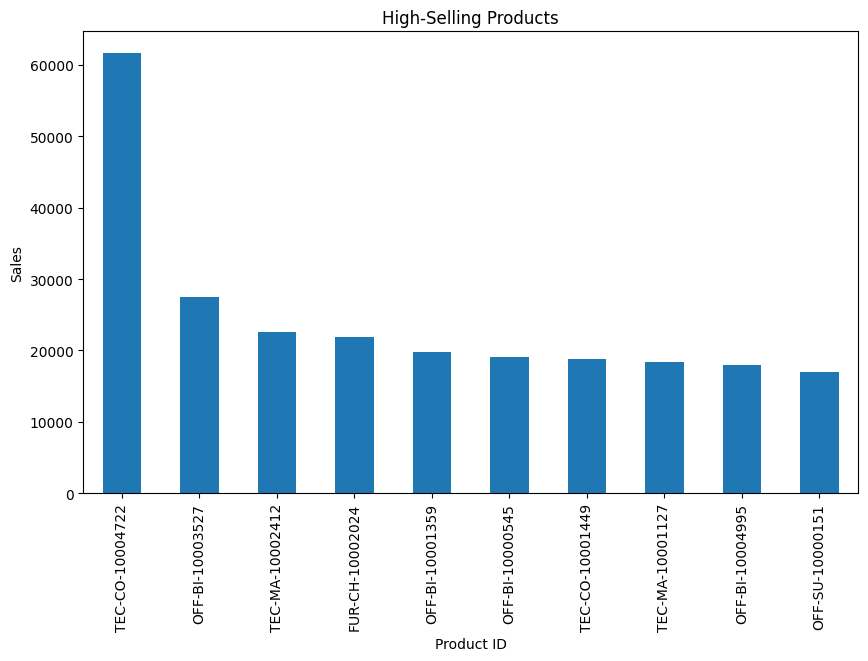

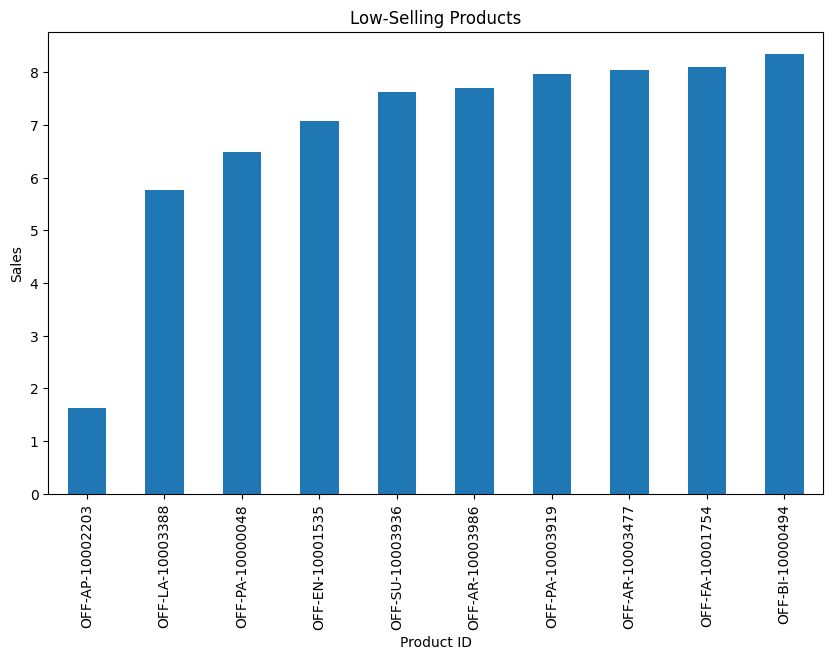

<ipython-input-7-1b3994c8dc2a>:36: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order_Year'] = pd.to_datetime(superstore_data['Order_Date']).dt.year


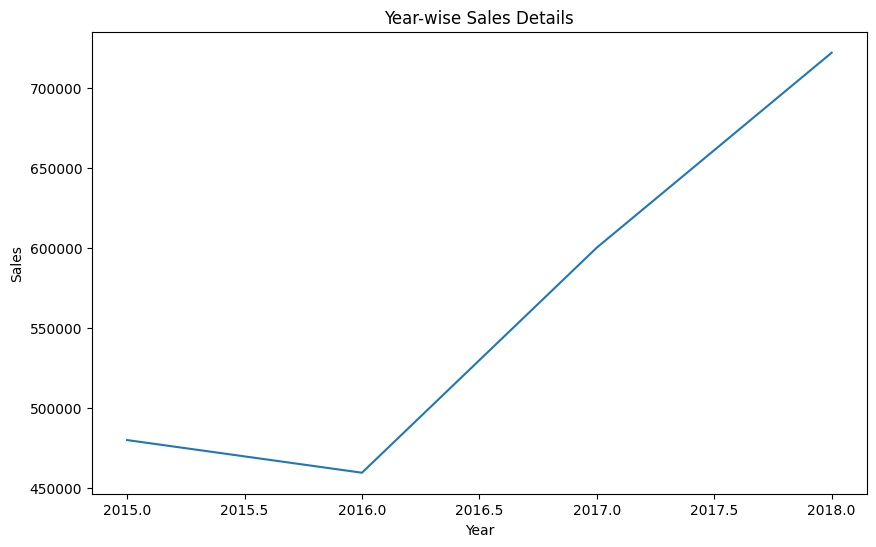

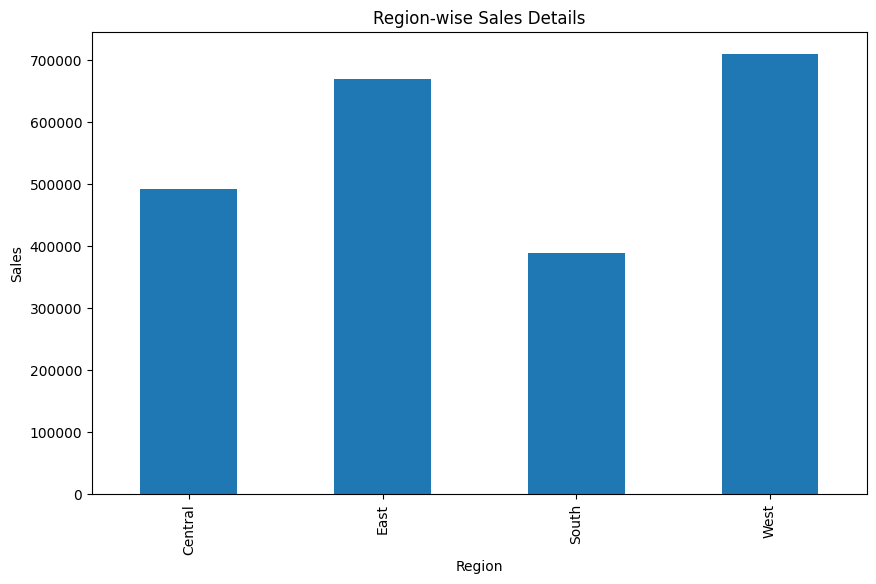

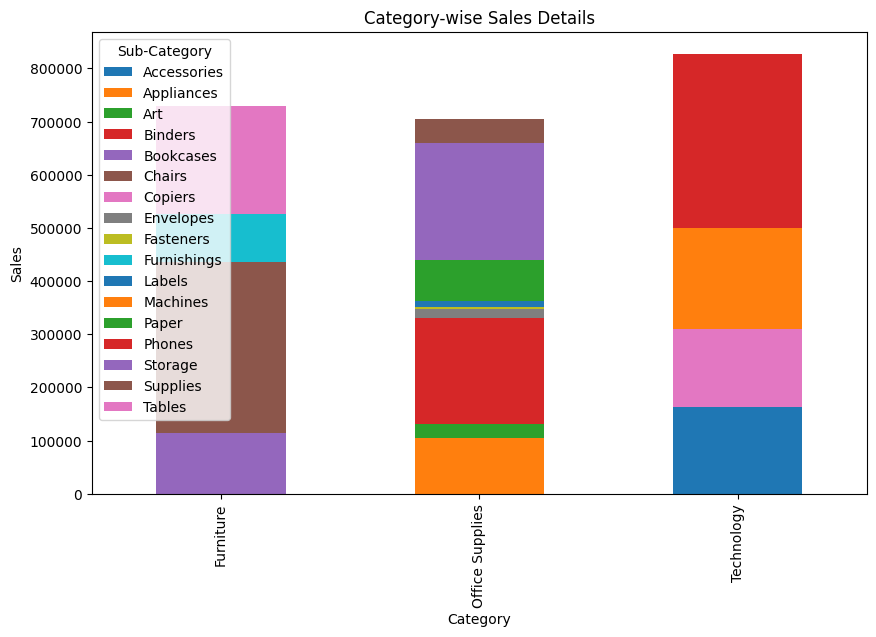

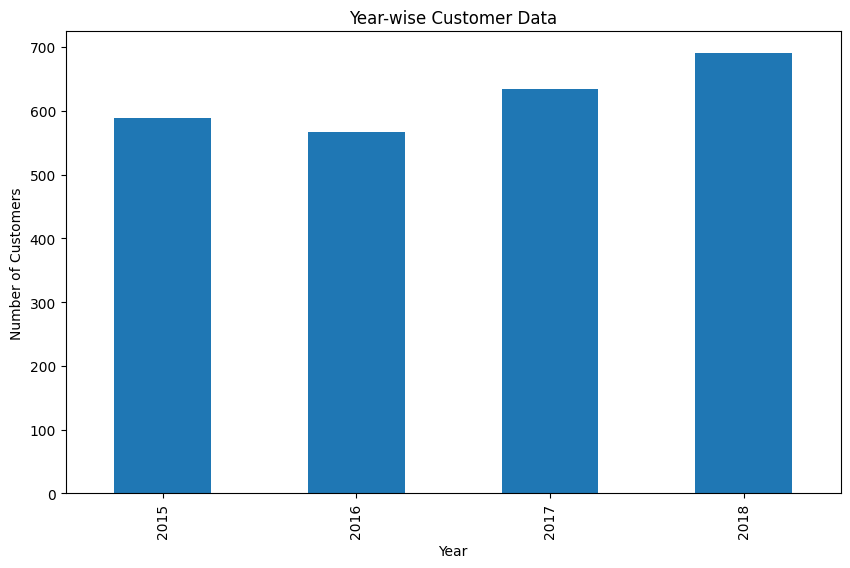

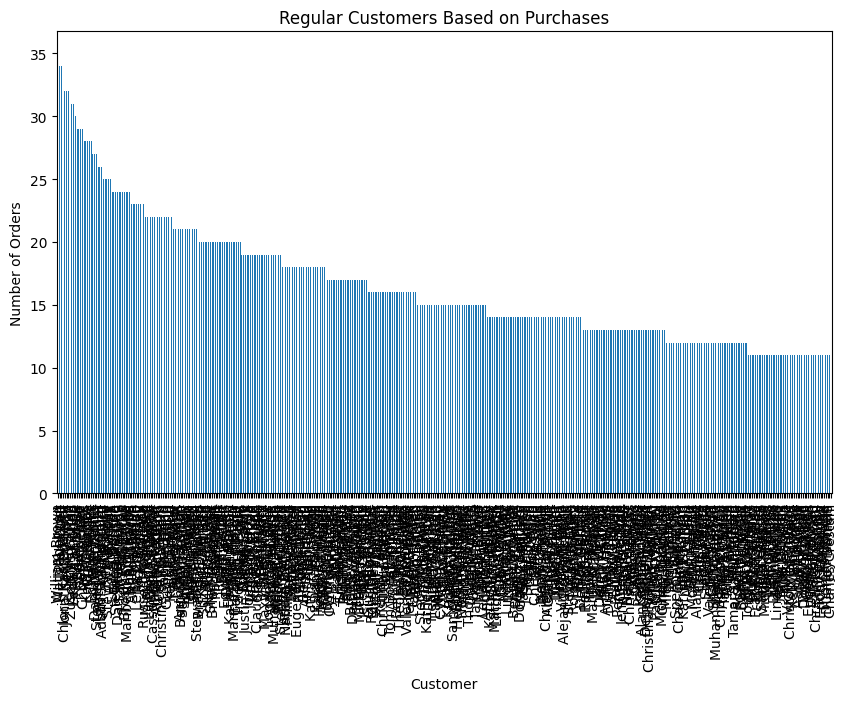

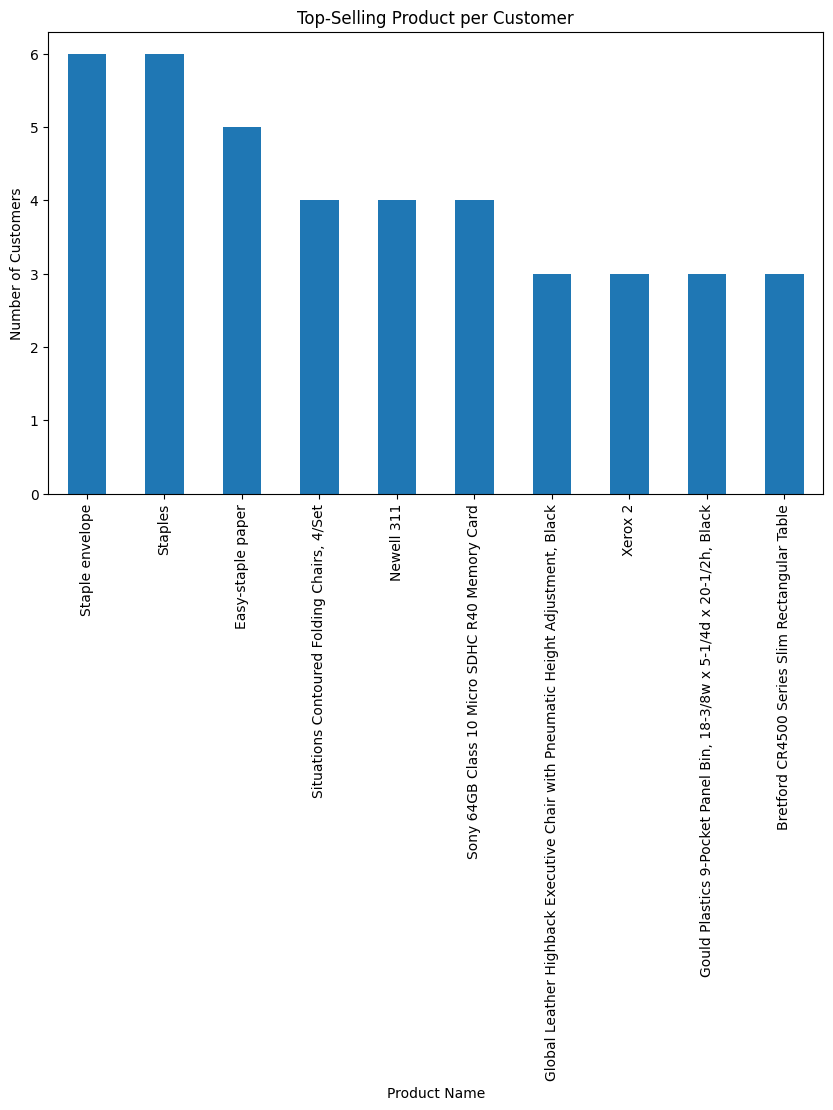

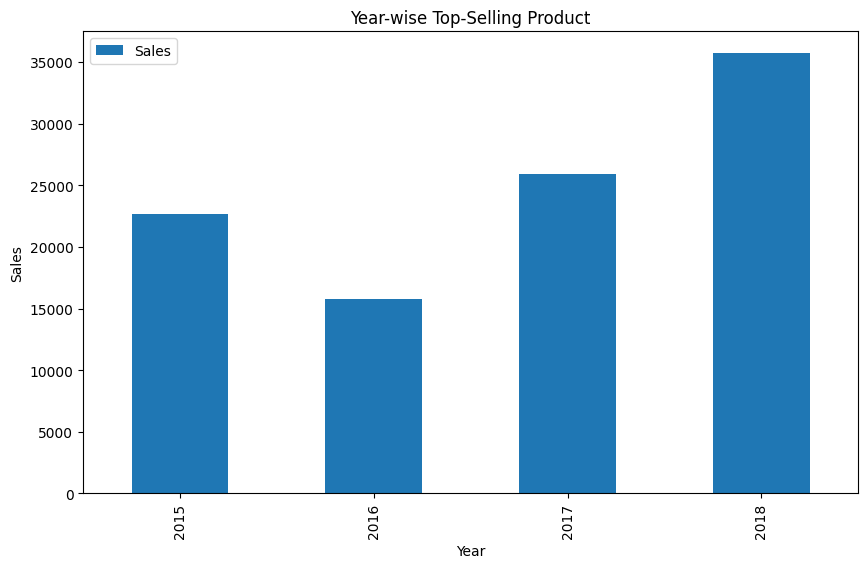

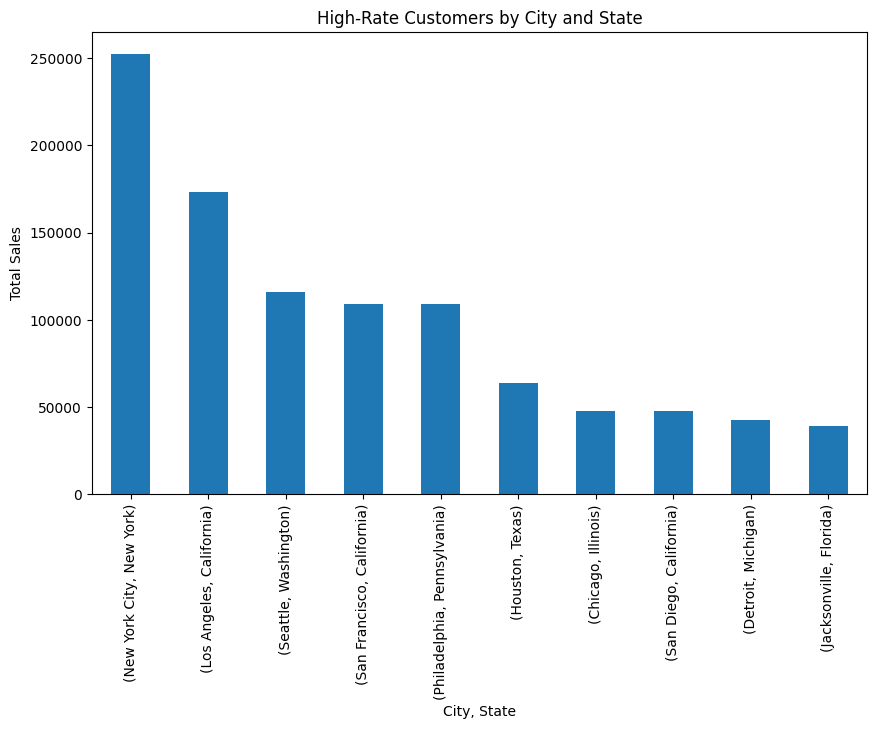

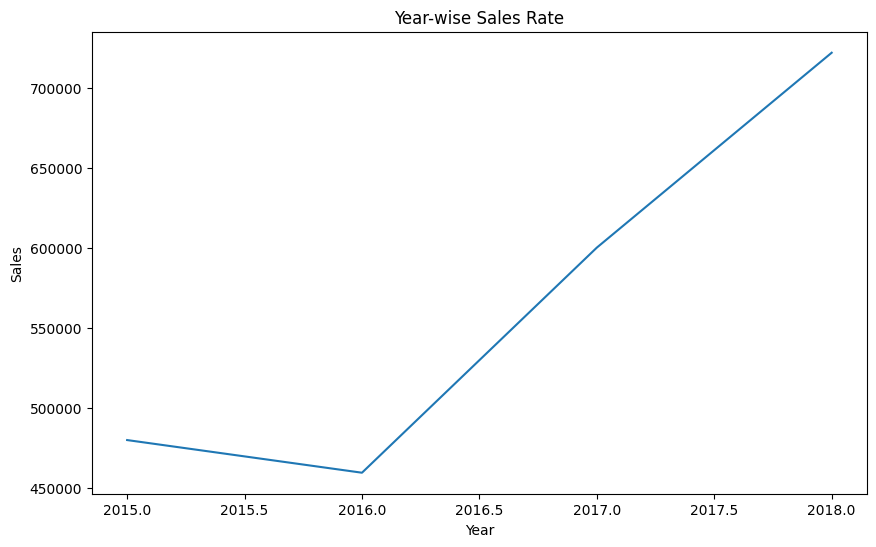

Top selling year: 2018


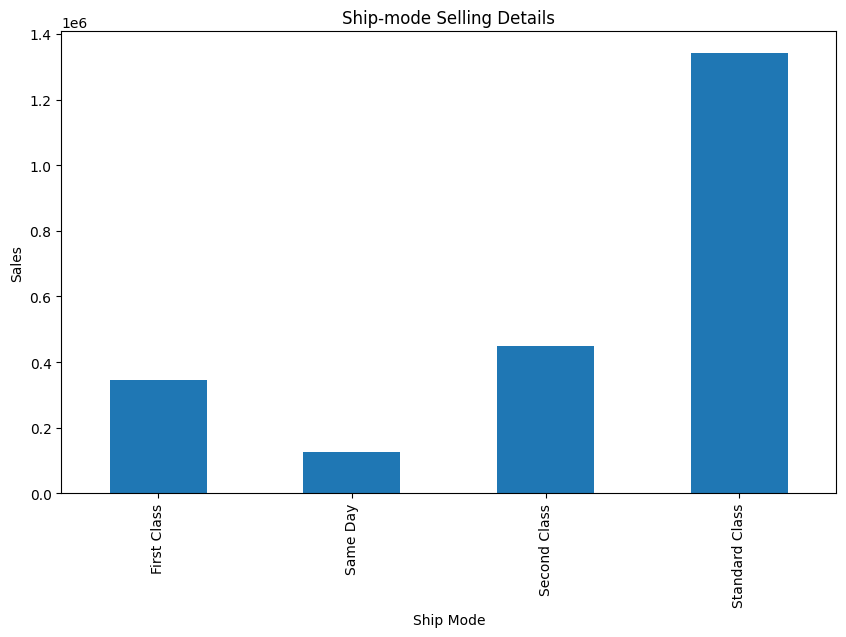

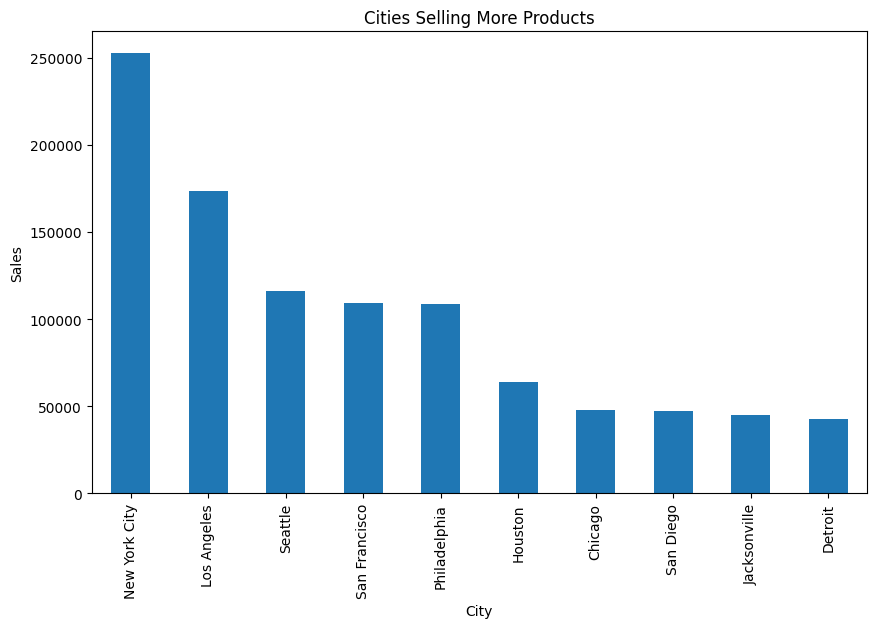

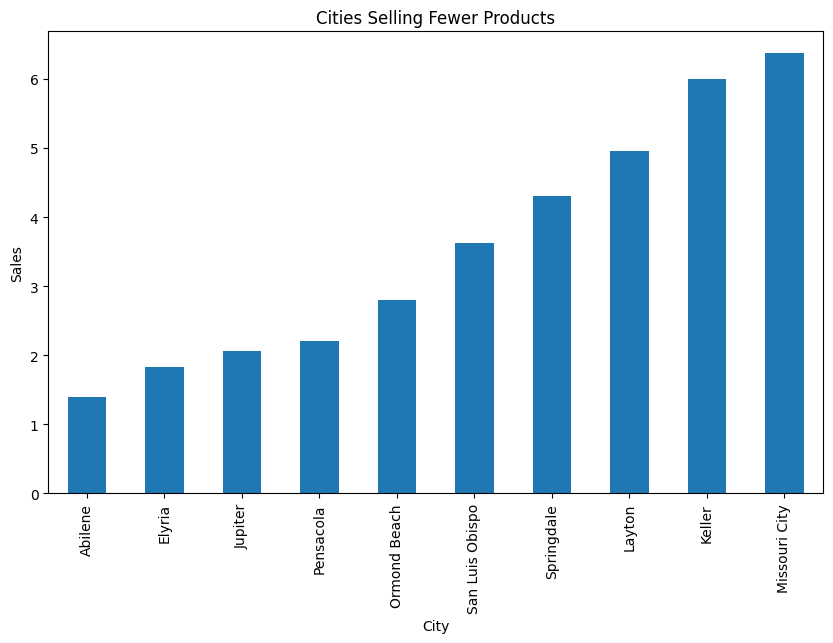

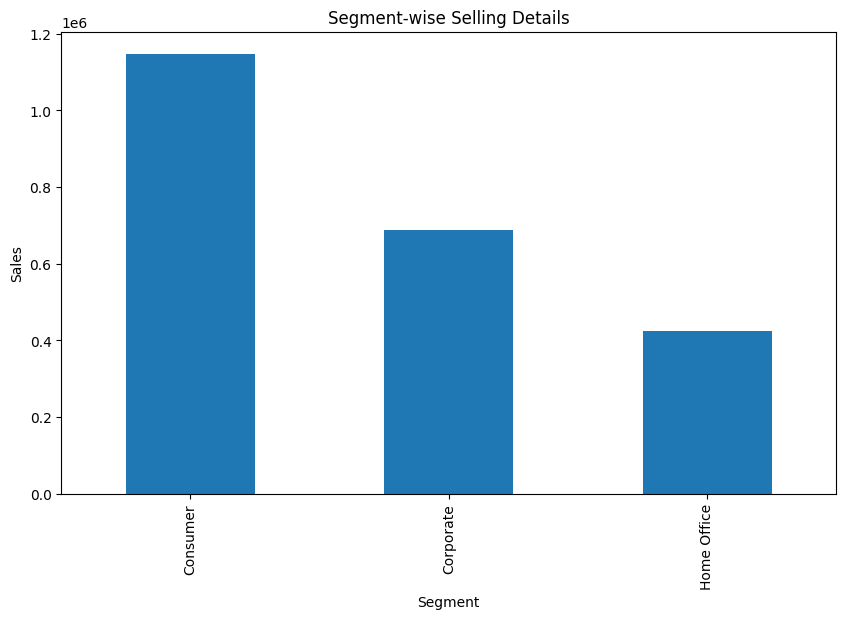

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Superstore_Final_Dataset
superstore_data = pd.read_csv("/superstore_final_dataset (1)(1).csv", encoding='latin1')

# Print dataset details
print(superstore_data.head())
print(superstore_data.info())

### Product Analysis ###
# A. Visualize Product details with Product ID and Product Name
product_details = superstore_data.groupby(['Product_ID', 'Product_Name']).size().reset_index(name='Count')
product_details.plot.bar(x='Product_ID', y='Count', figsize=(10, 6))
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Product Details')
plt.show()

# B. High-Selling and Low-Selling Products by Product_ID
product_sales = superstore_data.groupby('Product_ID')['Sales'].sum()
high_selling_products = product_sales.nlargest(10)
low_selling_products = product_sales.nsmallest(10)
high_selling_products.plot.bar(figsize=(10, 6))
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.title('High-Selling Products')
plt.show()
low_selling_products.plot.bar(figsize=(10, 6))
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.title('Low-Selling Products')
plt.show()

# C. Year-wise visualize sales details
superstore_data['Order_Year'] = pd.to_datetime(superstore_data['Order_Date']).dt.year
sales_yearwise = superstore_data.groupby('Order_Year')['Sales'].sum()
sales_yearwise.plot.line(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year-wise Sales Details')
plt.show()

# D. Region-wise visualize sales details
region_sales = superstore_data.groupby('Region')['Sales'].sum()
region_sales.plot.bar(figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region-wise Sales Details')
plt.show()

# E. Category and Sub_category-wise visualize sales
category_sales = superstore_data.groupby(['Category', 'Sub_Category'])['Sales'].sum().unstack()
category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category-wise Sales Details')
plt.legend(title='Sub-Category')
plt.show()

### Customer Analysis ###
# A. Visualize customer data year-wise
customer_yearwise = superstore_data.groupby('Order_Year')['Customer_Name'].nunique()
customer_yearwise.plot.bar(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Year-wise Customer Data')
plt.show()

# B. Visualize regular customers based on their purchases
regular_customers = superstore_data['Customer_Name'].value_counts()
regular_customers[regular_customers > 10].plot.bar(figsize=(10, 6))
plt.xlabel('Customer')
plt.ylabel('Number of Orders')
plt.title('Regular Customers Based on Purchases')
plt.show()

# C. Visualize top-selling product for each customer
top_selling_product_per_customer = superstore_data.groupby('Customer_Name')['Product_Name'].agg(lambda x: x.value_counts().index[0])
top_selling_product_per_customer.value_counts().nlargest(10).plot.bar(figsize=(10, 6))
plt.xlabel('Product Name')
plt.ylabel('Number of Customers')
plt.title('Top-Selling Product per Customer')
plt.show()

# D. Visualize year-wise top-selling product
yearwise_top_selling_product = superstore_data.groupby(['Order_Year', 'Product_Name'])['Sales'].sum().reset_index()
yearwise_top_selling_product = yearwise_top_selling_product.loc[yearwise_top_selling_product.groupby('Order_Year')['Sales'].idxmax()]
yearwise_top_selling_product.plot.bar(x='Order_Year', y='Sales', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year-wise Top-Selling Product')
plt.show()

# E. Visualize high-rate customers in the City and state
high_rate_customers = superstore_data.groupby(['City', 'State'])['Sales'].sum().nlargest(10)
high_rate_customers.plot.bar(figsize=(10, 6))
plt.xlabel('City, State')
plt.ylabel('Total Sales')
plt.title('High-Rate Customers by City and State')
plt.show()

### Sales Analysis ###
# A. Year-wise sales rate
sales_yearwise = superstore_data.groupby('Order_Year')['Sales'].sum()
sales_yearwise.plot.line(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year-wise Sales Rate')
plt.show()

# B. Top selling year
top_selling_year = superstore_data.groupby('Order_Year')['Sales'].sum().idxmax()
print("Top selling year:", top_selling_year)

# C. Ship-mode selling details
ship_mode_sales = superstore_data.groupby('Ship_Mode')['Sales'].sum()
ship_mode_sales.plot.bar(figsize=(10, 6))
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.title('Ship-mode Selling Details')
plt.show()

# D. Which city sells more products and fewer products?
city_sales = superstore_data.groupby('City')['Sales'].sum()
city_sales.nlargest(10).plot.bar(figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Cities Selling More Products')
plt.show()
city_sales.nsmallest(10).plot.bar(figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Cities Selling Fewer Products')
plt.show()

# E. Segment-wise selling details
segment_sales = superstore_data.groupby('Segment')['Sales'].sum()
segment_sales.plot.bar(figsize=(10, 6))
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Segment-wise Selling Details')
plt.show()

